In [1]:
from scipy.io import wavfile
import noisereduce as nr
import librosa
%matplotlib inline 

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
from IPython.display import Audio 
audio_file = './summer_2022_project/audio/4.wav'
# load data
rate, data = wavfile.read(audio_file)
Audio(audio_file)

In [27]:
path = './summer_2022_project/'
# load data
rate, data = wavfile.read(audio_file)
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("reduced_noise.wav", rate, reduced_noise)

In [24]:
reduced_noise

array([19, 30, 25, ...,  0,  0,  0], dtype=int16)

In [30]:
signal, sr = librosa.load(audio_file) # signal already normalized
signal

array([ 2.3931498e-03,  4.0583280e-03,  5.5429689e-03, ...,
       -8.2109955e-06,  4.3600598e-06,  0.0000000e+00], dtype=float32)

In [7]:
len(data)
len(data)/sr

21356

Text(0.5, 1.0, 'librosa (normalized amplitude)')

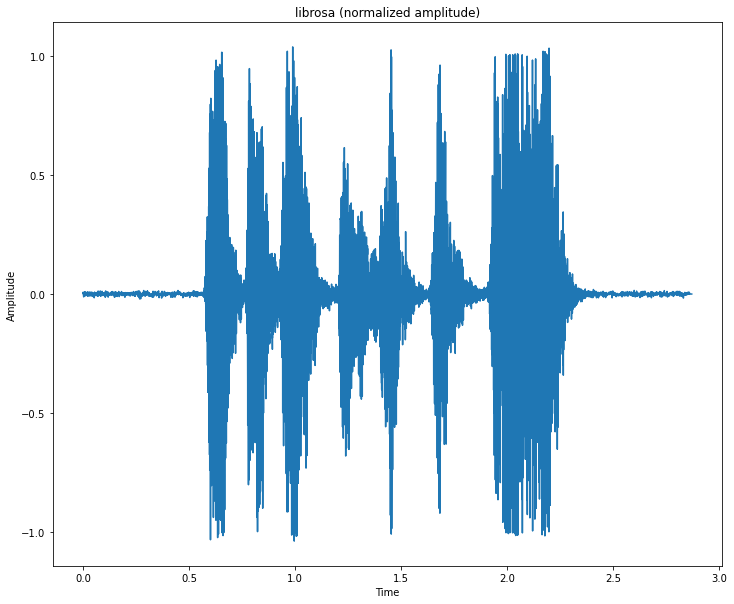

In [31]:
import matplotlib.pyplot as plt
import numpy as np
times = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,10))
plt.plot(times, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("librosa (normalized amplitude)")

Text(0.5, 1.0, 'scipy.wav (amplitude not normalized)')

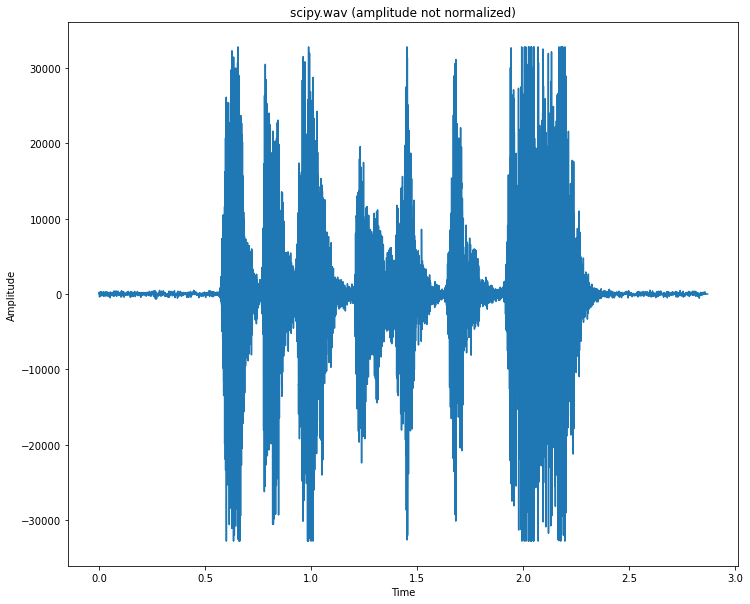

In [29]:
times = np.linspace(0, len(data)/rate, len(data))

plt.figure(figsize=(12,10))
plt.plot(times, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('scipy.wav (amplitude not normalized)')

They are the same waveform. The librosa one is already normalized.

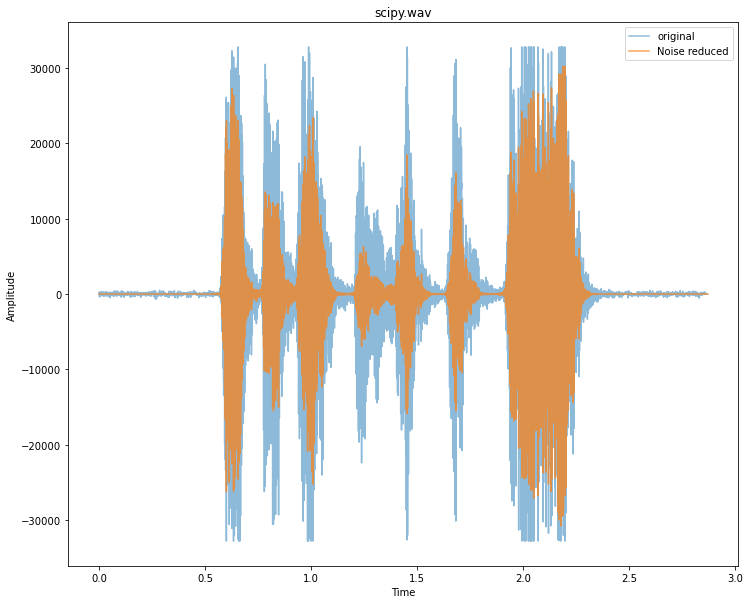

In [32]:
times = np.linspace(0, len(data)/rate, len(data))

plt.figure(figsize=(12,10))
plt.plot(times, data, label='original', alpha=.5)
plt.plot(times, reduced_noise, label='Noise reduced', alpha=.7)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('scipy.wav')
plt.legend()

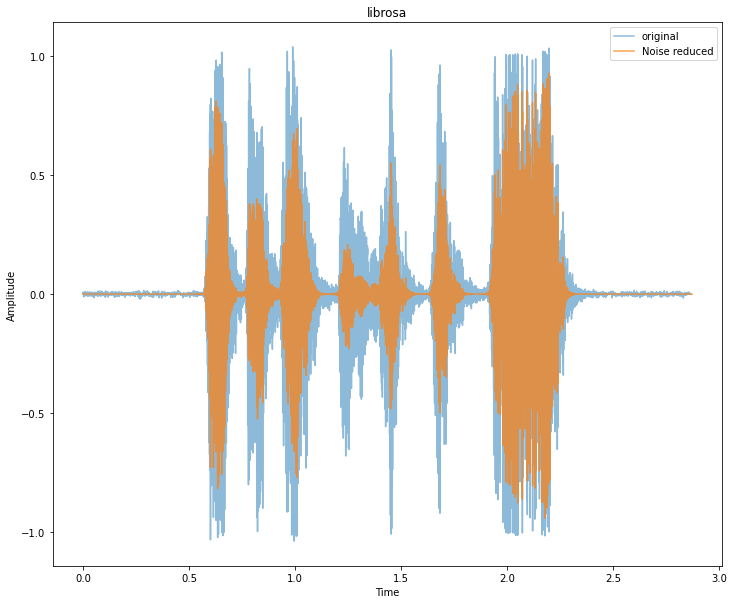

In [34]:
times = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,10))
plt.plot(times, signal, label='original', alpha=.5)
plt.plot(times, nr.reduce_noise(signal, sr), label='Noise reduced', alpha=.7)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('librosa')
plt.legend()

They are the same.